### Import Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [5]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

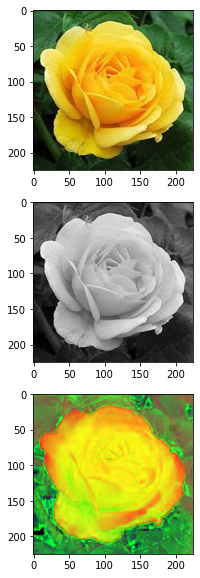

In [3]:
#Read image

img = cv.imread('1.png', 1)

#Method 1 of dispplaying (in a separate window)
cv.imshow('Orginal image', img)
cv.waitKey()
cv.destroyAllWindows()

#conveerting to grey
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#convert image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#Method 2 of displaying - plotting
#3-row 1-column
f, axs = plt.subplots(3, 1, figsize=(10,10))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(img_grey, cv.COLOR_BGR2RGB))
axs[2].imshow(cv.cvtColor(img_hsv, cv.COLOR_BGR2RGB))

In [2]:
#Load/read video
video = cv.VideoCapture('small_laptop_connections.mov')

#Web cam will open
# video = cv.VideoCapture(0)

#Take each frame of the video
while(video.isOpened()):
    
    ret, frame = video.read()
    
    #Convert frames from BGR to HSV
    hsvFrame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    #Defining lower and upper ranges of the color blue
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    #Threshold the HSV frame from a range of color blue
    blueMask = cv.inRange(hsvFrame, lower_blue, upper_blue)
    
    #Extract the blue object
    result = cv.bitwise_and(frame, frame, mask = blueMask)
    
    #Display the video
    
    #1 orginal
    originalVideo = cv.resize(frame, (400, 400))
    cv.imshow('Original Video', originalVideo)
    
    #1 binary
    binaryVideo = cv.resize(blueMask, (400, 400))
    cv.imshow('Binary Video', binaryVideo)
    
    #1 blue
    FinalVideo = cv.resize(result, (400, 400))
    cv.imshow('Final Video', FinalVideo)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
video.release()
cv.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
